Projekt Uczenie Maszynowe

Import potrzebnych bibliotek

In [4]:
import pandas as pd
import csv
import matplotlib

Import danych.

In [5]:
health = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
health

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


Odrzucenie kolumn nieistotnych z założenia w naszym modelu, tzn. płeć, zawód. Ta druga kolumna jest odrzucona, ponieważ praca nie ma większego wpływu na jakość snu, poza między innymi wywołanym stresem, który jest już zawarty w zbiorze danych.

In [6]:
health = health.drop('Gender', axis = 1)
health = health.drop('Occupation', axis = 1)

Opis BMI jest słowny, informuje o tym czy u danej osoby pojawia się nadwaga, niedowaga. Zastosowane zostaje zatem one-hot kodowanie, żeby taka zmiana nie wpłynęła na złą interpretację danych.

Importowanie najpierw biblioteki OneHotEncoded

In [7]:
from sklearn.preprocessing import OneHotEncoder

Tworzenie instancji OneHotEncoder, dopasowanie danych

In [8]:
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(health[['BMI Category']])

Utworzenie nowej kolumny

In [9]:
health_encoded = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(['BMI Category']))

Dodanie kolumny do istniejących danych oraz usunięcie kolumny 'BMI Category', która została przekształcona.

In [10]:
health = pd.concat([health, health_encoded], axis=1)
health.drop(columns=['BMI Category'], inplace=True)

In [11]:
health_encoded = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(['BMI Category']))

Podobna sytuacja pojawia się w przypadku kolumny 'Sleep Disorder'. Znów stosujemy kodowanie one-hot.

In [ ]:
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(health[['Sleep Disorder']])

health_encoded_ = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(['Sleep Disorder']))

health = pd.concat([health, health_encoded_], axis=1)
health.drop(columns=['Sleep Disorder'], inplace=True)

Dokonanie podziału ciśnienia krwi na dwie oddzielne kolumny : 'Systolic Pressure', 'Diastolic Pressure'.

In [21]:
health[['Systolic Pressure ', 'Diastolic Pressure']] = health['Blood Pressure'].str.split('/', expand=True).astype(int)
health = health.drop('Blood Pressure', axis = 1)

Import bibliotek potrzebnych do wizualizacji korelacji pomiędzy danymi.

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

Macierz korelacji:

<Axes: >

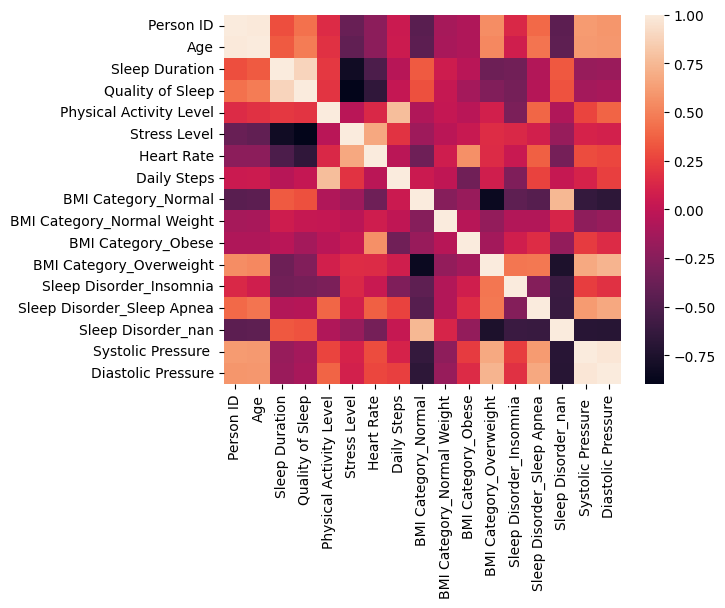

In [22]:
sns.heatmap(health.corr())

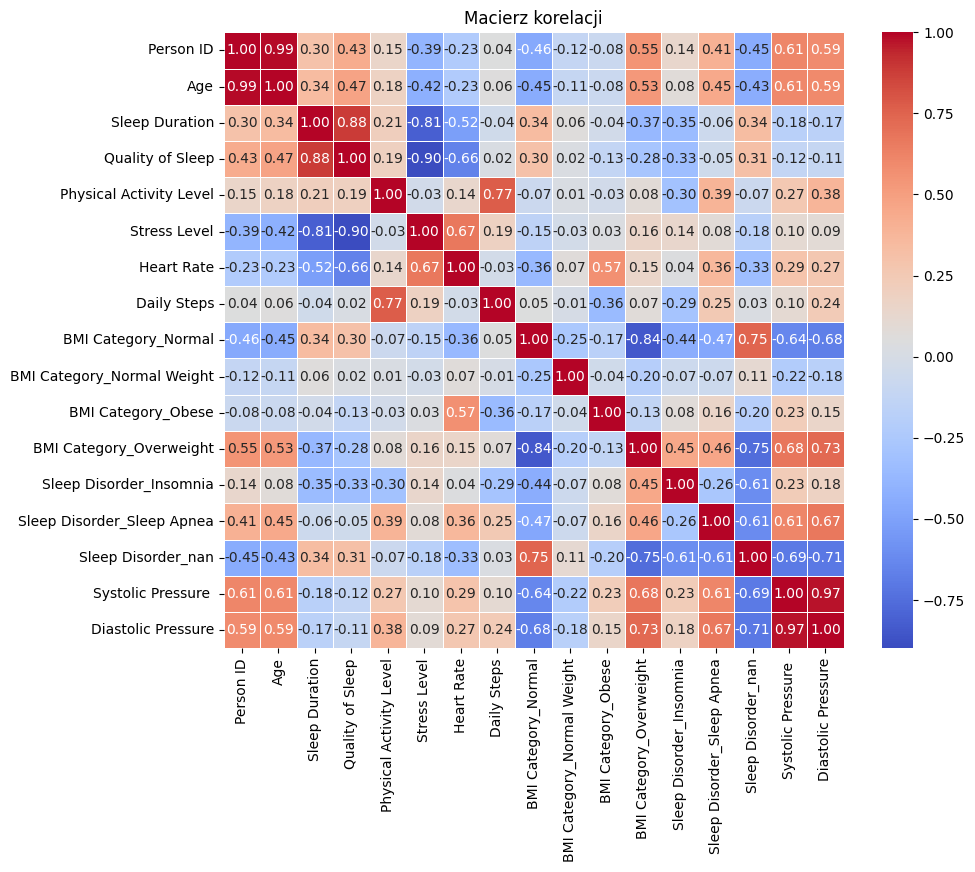

In [23]:
plt.figure(figsize=(10, 8))
sns.heatmap(health.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Macierz korelacji')
plt.show()

# Interpretacja macierzy korelacji
Chcemy wiedzieć jakie czynniki mają wpływ na jakość snu. 

Z macierzy korelacji możemy odczytać, że istnieje bardzo silna dodatnia korelacja między czasem snu (Sleep Duration), a jakością snu. Oznacza to, że dłuższy czas snu jest związany z lepszą jakością snu. Widzimy również, że istnieje bardzo silna ujemna korelacja między poziomem stresu (Stress Level) a jakością snu (Quality of Sleep). Oznacza to, że kiedy poziom stresu wzrasta, jakość snu znacząco się pogarsza.

Umiarkowana dodatnia korelacja istnieje pomiędzy wiekiem a jakością snu, co sugeruje, że wiek może mieć wpływ ma lepszą jakość snu.
Umiarkowana ujemna korelacja między ciśnieniem, a jakością snu, mówi że wyższe ciśnienie powoduje gorszą jakość snu.

Na jakość snu wpływu nie mają (korelacja bliska zeru) dzienna liczba kroków, wskaźnik BMI, bezdech senny oraz ciśnienie rozkurczowe.

Podsumowując czas snu oraz wiek wpływają na lepszą jakość snu, natomiast stres oraz wyższe ciśnienie powodują pogorszenie snu.

Wnioskując na podstawie obu macierzy korelacji usuwamy z tabeli kolumny z wartościami, które mają najmniejszą korelację z wartościami kolumny 'Quality of Sleep'.

In [24]:
health = health.drop(['Daily Steps', 'BMI Category_Normal', 'BMI Category_Obese', 'BMI Category_Overweight', 'Sleep Disorder_Sleep Apnea', 'Diastolic Pressure'], axis = 1)